In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import random
Z = 16

In [3]:
def read_txt(fname):
    f = open(fname)
    fl = f.readlines()
    f.close()
    data = []
    for line in fl:
        data.append(line.split())
    data = np.array(data, dtype='float').T
    return data

def read_all_CHAIN_SIZE(fnames):
    data = []
    for fname in fnames:
        f = read_txt(fname)
        data.append(f)
    data = np.vstack(data)
    return data

In [4]:
def bootstrap_sampling(data1d, n_samples, sample_size):
    averages = []
    deviations = []
    for i in range(n_samples):
        boot = random.choices(data1d, k=sample_size)
        averages.append(np.mean(boot))
        deviations.append(np.std(boot))
    return averages, deviations

def bootstrap_columns(data2d, n_samples=5000, sample_size=50):
    booted_ave, booted_std = np.empty((n_samples, data2d.shape[1])), np.empty((n_samples, data2d.shape[1]))
    for i, data in enumerate(data2d.T):
        m, s = bootstrap_sampling(data, n_samples=n_samples, sample_size=sample_size)
        booted_ave[:,i] = m * 1
        booted_std[:,i] = s * 1
    return booted_ave, booted_std

In [5]:
basename_NP2 = "bundles/NP2-solo/HBs_bundeling/MD{0}/CENTRAL/CHAIN_SIZE"
basename_NP3 = "bundles/NP3-solo/HBs-bundeling/MD{0}/CENTRAL/CHAIN_SIZE-md{0}"
basename_NP2sub = "bundles/NP2-SUB/HB_bundeling/CHAIN_SIZE-md{0}"
basename_NP3sub = "bundles/NP3-SUB/HB_bundling/CHAIN_SIZE-md{0}"

fnames = {"AuNP2" : [basename_NP2.format(i) for i in range(1,5)],
          "AuNP3" : [basename_NP3.format(i) for i in range(1,5)],
          "AuNP2sub" : [basename_NP2sub.format(i) for i in range(1,5)],
          "AuNP3sub" : [basename_NP3sub.format(i) for i in range(1,5)]}
keys = fnames.keys()
colors = {"AuNP2": (0.5, 0.7, 1.0),
          "AuNP3": (0.4, 0.9, 0.6),
          "AuNP2sub": (0.5, 0.7, 1.0),
          "AuNP3sub": (0.3, 0.9, 0.5)}

In [6]:
bundles = {}
bootstrap = {}
for key, val in fnames.items():
    print(key)
    bundles[key] = read_all_CHAIN_SIZE(val)
    bootstrap[key] = bootstrap_columns(bundles[key])[0]

AuNP2
AuNP3
AuNP2sub
AuNP3sub


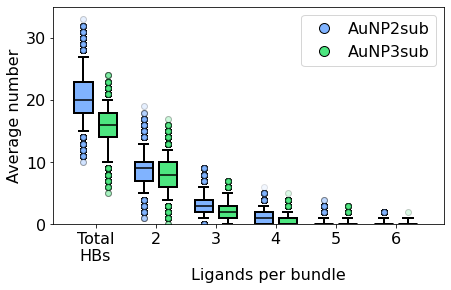

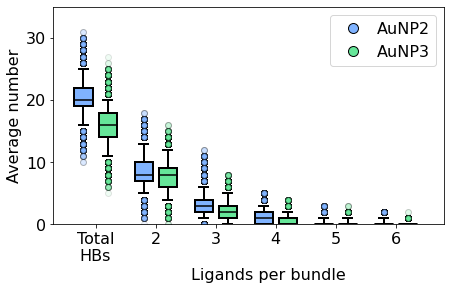

In [9]:
def box_comparison(bundles, keys, prefix='test'):
    bp = dict(linestyle='-', lw=2, color='k', facecolor='r')
    fp = dict(marker='o', ms=6, ls='none', mec='k', mew=1, alpha=0.1)
    mp = dict(ls='-', lw=1.5, color='k')
    cp = dict(ls='-', lw=2, color='k')
    wp = dict(ls='-', lw=2, color='k')

    fig, ax = plt.subplots(figsize=(7, 4), ncols=1, nrows=1)
    for k, key in enumerate(keys):
        data = bundles[key]
        for i, x in enumerate(data.T):
            bpl = ax.boxplot(x, widths=0.3, positions=[i+0.4*k], whis=[5,95], patch_artist=True,
                             boxprops=bp, flierprops=fp, medianprops=mp, capprops=cp, whiskerprops=wp)
            bpl['boxes'][0].set_facecolor(colors[key])
            bpl['fliers'][0].set_markerfacecolor(colors[key])
        ax.errorbar(-10,-10, label=key, color=colors[key], mec='k', mew=1, fmt='o', ms=10)
    ax.legend(fontsize=Z, handletextpad=0.5)
    ax.set_xticks(np.linspace(0,data.shape[1]-1,data.shape[1])+0.2)
    ax.set_xticklabels(["Total\nHBs", "2", "3", "4", "5", "6"])
    ax.set_xlim(-0.5,data.shape[1])
    ax.set_ylim(0,35)
    ax.set_xlabel("Ligands per bundle", fontsize=Z, position=[0.55,0])
    ax.set_ylabel("Average number", fontsize=Z)
    ax.tick_params(labelsize=Z)
    plt.savefig(prefix + "_bundles.svg", format='svg', bbox_inches='tight')
    plt.show()

box_comparison(bundles, ['AuNP2sub', 'AuNP3sub'], prefix='Figures/subtogether')
box_comparison(bundles, ['AuNP2', 'AuNP3'], prefix='Figures/together')
#box_comparison(bootstrap, ['AuNP2sub', 'AuNP3sub'])
#box_comparison(bootstrap, ['AuNP2', 'AuNP3'])

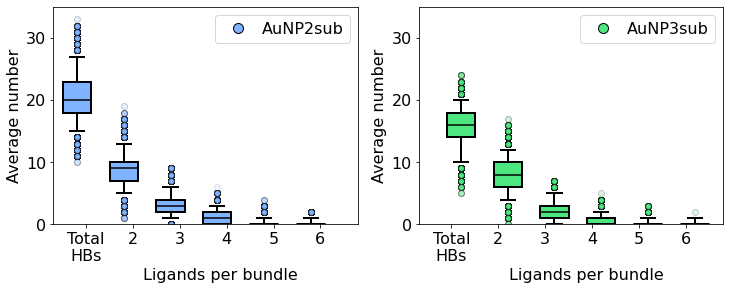

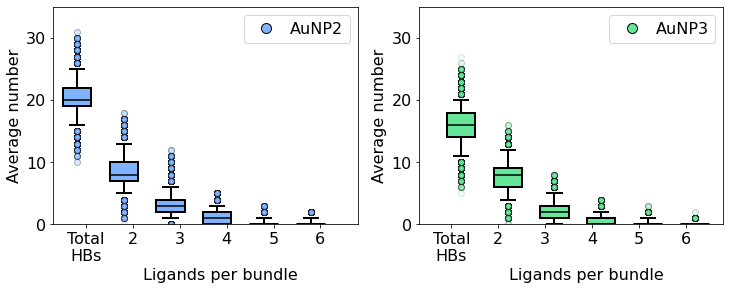

In [14]:
def box_comparison_separate(bundles, keys, prefix='test'):
    bp = dict(linestyle='-', lw=2, color='k', facecolor='r')
    fp = dict(marker='o', ms=6, ls='none', mec='k', mew=1, alpha=0.1)
    mp = dict(ls='-', lw=1.5, color='k')
    cp = dict(ls='-', lw=2, color='k')
    wp = dict(ls='-', lw=2, color='k')

    fig, axs = plt.subplots(figsize=(12, 4), ncols=2, nrows=1)
    for k, (key, ax) in enumerate(zip(keys, axs)):
        data = bundles[key]
        for i, x in enumerate(data.T):
            bpl = ax.boxplot(x, widths=0.6, positions=[i+0.4*k], whis=[5,95], patch_artist=True,
                             boxprops=bp, flierprops=fp, medianprops=mp, capprops=cp, whiskerprops=wp)
            bpl['boxes'][0].set_facecolor(colors[key])
            bpl['fliers'][0].set_markerfacecolor(colors[key])
        ax.errorbar(-10,-10, label=key, color=colors[key], mec='k', mew=1, fmt='o', ms=10)
        ax.legend(fontsize=Z, handletextpad=0.5)
        ax.set_xticks(np.linspace(0,data.shape[1]-1,data.shape[1])+0.2)
        ax.set_xticklabels(["Total\nHBs", "2", "3", "4", "5", "6"])
        ax.set_xlim(-0.5,data.shape[1])
        ax.set_ylim(0,35)
        ax.set_xlabel("Ligands per bundle", fontsize=Z, position=[0.55,0])
        ax.set_ylabel("Average number", fontsize=Z)
        ax.tick_params(labelsize=Z)
    plt.savefig(prefix + "_bundles.svg", format='svg', bbox_inches='tight')
    plt.show()

box_comparison_separate(bundles, ['AuNP2sub', 'AuNP3sub'], prefix='Figures/subseparate')
box_comparison_separate(bundles, ['AuNP2', 'AuNP3'], prefix='Figures/separate')